In [1]:
import os
os.chdir("D:\IIT Kanpur\Time Series Project")
os.getcwd()

'D:\\IIT Kanpur\\Time Series Project'

In [2]:
import pandas as pd
nifty_df = pd.read_excel("Nf50_Data1.xlsx")
nifty_df.head()
#isinstance(nifty_df, pd.DataFrame)

,Time,Open,High,Low,Close,helper
0,2013-04-01,5697.35,5720.95,5675.90,5704.4,1483
1,2013-04-02,5701.70,5754.60,5687.15,5748.1,1482
2,2013-04-03,5740.20,5744.95,5650.10,5672.9,1481
3,2013-04-04,5640.65,5644.45,5565.65,5574.7,1480
4,2013-04-05,5568.10,5577.30,5534.70,5553.2,1479


In [4]:
yt_obs = nifty_df["Close"]
yt_obs

0        5704.40
1        5748.10
2        5672.90
3        5574.70
4        5553.20
          ...   
1478    11354.25
1479    11483.25
1480    11445.05
1481    11570.00
1482    11623.90
Name: Close, Length: 1483, dtype: float64

In [5]:
len(yt_obs)
import numpy as np
x = np.arange(len(yt_obs)) + 1
x
nifty_df['x'] = x
nifty_df.head()
nifty_df.drop(nifty_df.columns[[1,2,3,5]],axis = 1, inplace=True)
nifty_df.head()

,Time,Close,x
0,2013-04-01,5704.4,1
1,2013-04-02,5748.1,2
2,2013-04-03,5672.9,3
3,2013-04-04,5574.7,4
4,2013-04-05,5553.2,5


In [6]:
nifty_time = nifty_df.set_index("Time")
nifty_time

,Close,x
Time,,
2013-04-01,5704.40,1
2013-04-02,5748.10,2
2013-04-03,5672.90,3
2013-04-04,5574.70,4
2013-04-05,5553.20,5
...,...,...
2019-03-25,11354.25,1479
2019-03-26,11483.25,1480
2019-03-27,11445.05,1481


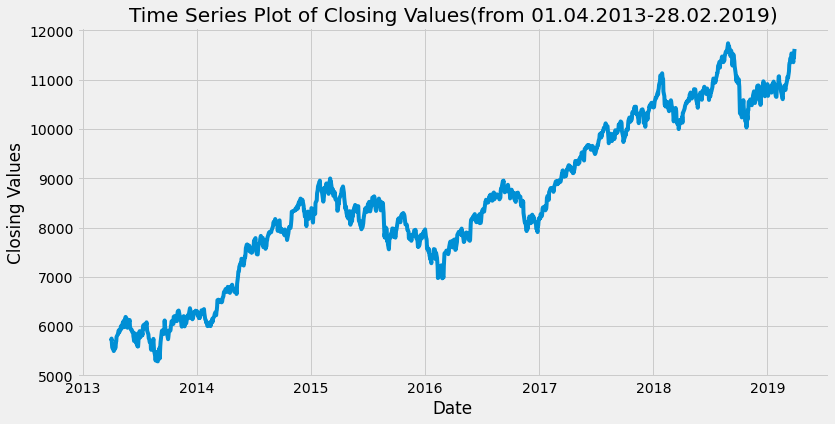

In [7]:
import matplotlib.pyplot as plt
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 6))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Closing Values")
plt.title("Time Series Plot of Closing Values(from 01.04.2013-28.02.2019)")
 

plt.plot(nifty_time["Close"])

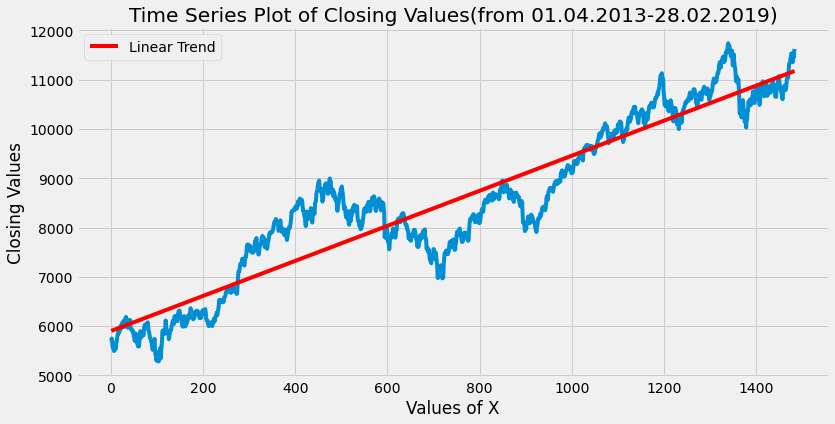

In [8]:
import numpy as np
import matplotlib.pyplot as plt

lin_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 1))
#quad_trend = np.poly1d(np.polyfit(nifty_df["x"],nifty_df["Close"], 2))
myline = np.linspace(1, 1483, 1600)



# setting figure size to 12, 10
plt.figure(figsize=(12, 6))
 
# Labelling the axes and setting
# a title
plt.xlabel("Values of X")
plt.ylabel("Closing Values")
plt.title("Time Series Plot of Closing Values(from 01.04.2013-28.02.2019)")

plt.plot(nifty_df['x'],nifty_df['Close'])

plt.plot(myline, lin_trend(myline), color = 'red', label = 'Linear Trend')

#plt.plot(myline, quad_trend(myline), color = 'yellow', label = 'Quadratic Trend')

plt.legend(framealpha=1, frameon=True)

plt.show()

#quad_trend(5)

In [9]:
import pandas as pd 
#np.polyfit(nifty_df["x"],nifty_df["High Points"],2)
T_t = lin_trend(x)
detrended_value = yt_obs/T_t
detrended_value

list_of_tuple = list(zip(nifty_df['Time'],x,yt_obs, T_t,detrended_value))
df1 = pd.DataFrame(list_of_tuple, columns=["Time","x","yt_obs", "T_t","detrended_value"])
df1.head()

,Time,x,yt_obs,T_t,detrended_value
0,2013-04-01,1,5704.4,5904.758539,0.966068
1,2013-04-02,2,5748.1,5908.315407,0.972883
2,2013-04-03,3,5672.9,5911.872276,0.959578
3,2013-04-04,4,5574.7,5915.429144,0.942400
4,2013-04-05,5,5553.2,5918.986013,0.938201


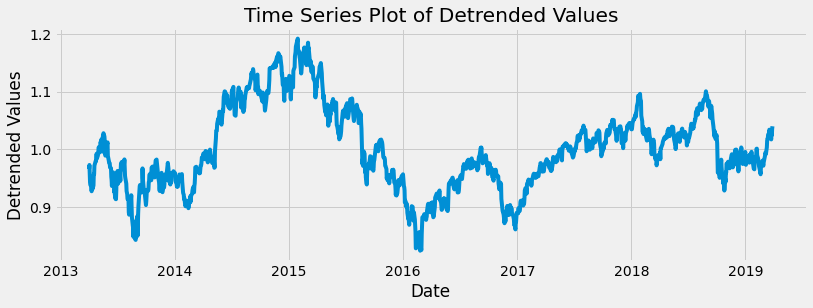

In [10]:
df1_time_index = df1.set_index("Time")
df1_time_index.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Detrended Values")
plt.title("Time Series Plot of Detrended Values")
 

plt.plot(df1_time_index["detrended_value"])

In [11]:
df1['month'] = pd.DatetimeIndex(df1['Time']).month

unadjusted_si = df1.groupby(by="month")["detrended_value"].mean()
unadjusted_si
adjusted_si = unadjusted_si*(12/sum(unadjusted_si))
sum(adjusted_si)
adjusted_si

month
1     0.990144
2     0.980181
3     0.994576
4     0.993573
5     1.004239
6     1.007393
7     1.025025
8     1.014042
9     1.011149
10    0.998328
11    0.994650
12    0.986699
Name: detrended_value, dtype: float64

In [12]:
seasonal_indices = []
for j in range(len(df1["month"])):
    seasonal_indices.append(adjusted_si[df1["month"][j]]) 
df1["seasonal_indices"] = seasonal_indices
df1.head()

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices
0,2013-04-01,1,5704.4,5904.758539,0.966068,4,0.993573
1,2013-04-02,2,5748.1,5908.315407,0.972883,4,0.993573
2,2013-04-03,3,5672.9,5911.872276,0.959578,4,0.993573
3,2013-04-04,4,5574.7,5915.429144,0.942400,4,0.993573
4,2013-04-05,5,5553.2,5918.986013,0.938201,4,0.993573


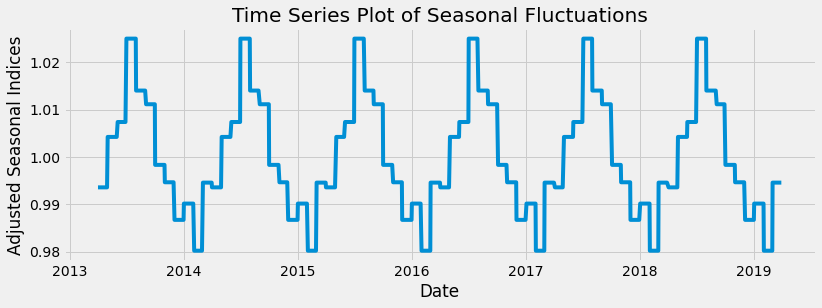

In [13]:
df1_after_seasonal = df1.set_index("Time")
df1_after_seasonal.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title

plt.xlabel("Date")
plt.ylabel("Adjusted Seasonal Indices")
plt.title("Time Series Plot of Seasonal Fluctuations")
 

plt.plot(df1_after_seasonal["seasonal_indices"])

In [14]:
df1["deseasonalized_values"] = detrended_value/seasonal_indices
df1.head()

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values
0,2013-04-01,1,5704.4,5904.758539,0.966068,4,0.993573,0.972317
1,2013-04-02,2,5748.1,5908.315407,0.972883,4,0.993573,0.979176
2,2013-04-03,3,5672.9,5911.872276,0.959578,4,0.993573,0.965784
3,2013-04-04,4,5574.7,5915.429144,0.942400,4,0.993573,0.948496
4,2013-04-05,5,5553.2,5918.986013,0.938201,4,0.993573,0.944270


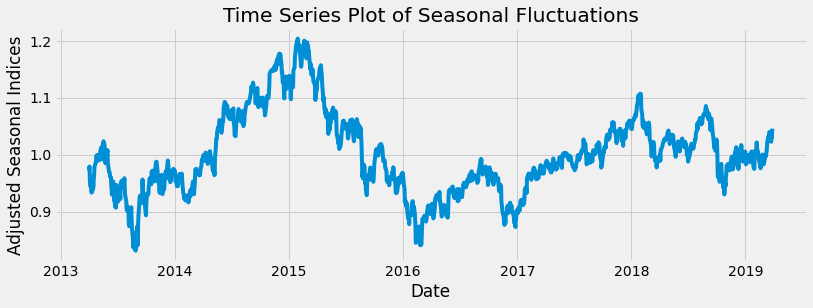

In [15]:
df1_deseasonal = df1.set_index("Time")
df1_deseasonal.head()
plt.figure(figsize=(12, 4))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Adjusted Seasonal Indices")
plt.title("Time Series Plot of Seasonal Fluctuations")
 

plt.plot(df1_deseasonal["deseasonalized_values"])

599.0

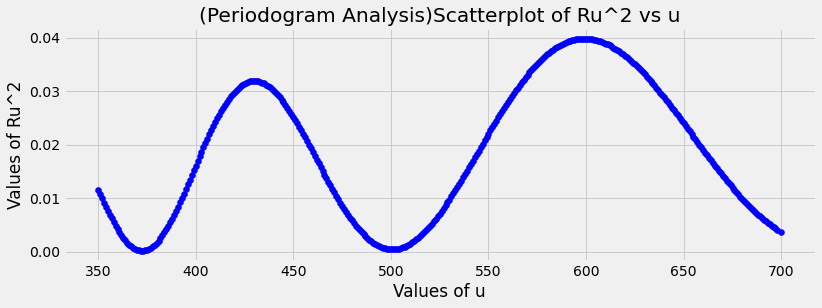

In [16]:
import math
ut = yt_obs/(T_t*seasonal_indices)
df1["ut"] = ut
df1.head()

u = np.floor(np.linspace(350,700,350))
u
A = []
B = []
for i in range(len(u)):
    A.append((2/len(ut))*sum(ut*np.cos((2*math.pi*x)/u[i])))
    B.append((2/len(ut))*sum(ut*np.sin((2*math.pi*x)/u[i])))
Ru_2 = np.square(A) + np.square(B)
Ru_2

plt.figure(figsize=(12, 4))
plt.xlabel("Values of u")
plt.ylabel("Values of Ru^2")
plt.title("(Periodogram Analysis)Scatterplot of Ru^2 vs u")

plt.scatter(u, Ru_2, c = "blue")

lamda = u[pd.Series(Ru_2).idxmax()]
lamda

1025.0

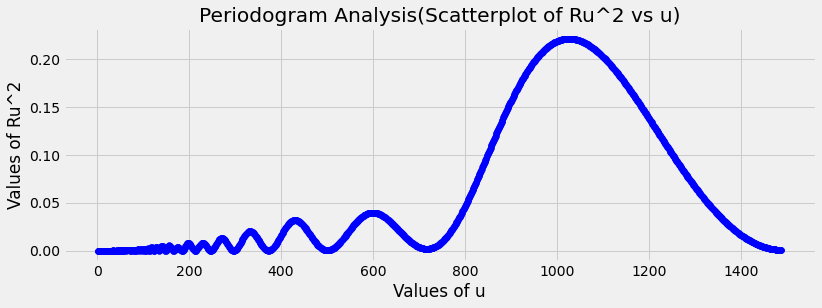

In [17]:
u_temp = np.floor(np.linspace(2,1487,1487))
u_temp
A = []
B = []
for i in range(len(u_temp)):
    A.append((2/len(ut))*sum(ut*np.cos((2*math.pi*x)/u_temp[i])))
    B.append((2/len(ut))*sum(ut*np.sin((2*math.pi*x)/u_temp[i])))
    
Ru_2 = np.square(A) + np.square(B)
Ru_2


plt.figure(figsize=(12, 4))
plt.xlabel("Values of u")
plt.ylabel("Values of Ru^2")
plt.title("Periodogram Analysis(Scatterplot of Ru^2 vs u)")
plt.scatter(u_temp, Ru_2, c = "blue")

lamda = u_temp[pd.Series(Ru_2).idxmax()]
lamda


In [18]:
float_array = (np.floor(np.linspace(2,700,700)))
float_array

Ru_2_new = Ru_2[float_array.astype(int)]

lamda_2nd = u_temp[pd.Series(Ru_2_new).idxmax()]
lamda_2nd 

598.0

In [19]:
lamda_geometric_mean = math.sqrt(lamda*lamda_2nd)
lamda_geometric_mean   #consider 783

782.9112337934614

In [20]:
import statistics as st
lamda = 783
#A0 = st.mean(ut)
#A_hat = (2/len(ut))*sum(ut*np.cos((2*math.pi*x)/lamda))
#B_hat = (2/len(ut))*sum(ut*np.sin((2*math.pi*x)/lamda))

cos_pred = np.cos((2*math.pi*x)/lamda)
sin_pred = np.sin((2*math.pi*x)/lamda)

df1["cos_pred"] = cos_pred
df1["sin_pred"] = sin_pred


from sklearn import linear_model

X_new = df1[['cos_pred', 'sin_pred']]
y_new = df1['ut']

regr = linear_model.LinearRegression()
regr.fit(X_new, y_new)

A0 = regr.intercept_
A_hat = regr.coef_[0]
B_hat = regr.coef_[1]
ut_hat = A0 + A_hat*cos_pred + B_hat*sin_pred
df1["ut_hat"] = ut_hat
df1.head()

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat
0,2013-04-01,1,5704.4,5904.758539,0.966068,4,0.993573,0.972317,0.972317,0.999968,0.008024,0.920784
1,2013-04-02,2,5748.1,5908.315407,0.972883,4,0.993573,0.979176,0.979176,0.999871,0.016048,0.920572
2,2013-04-03,3,5672.9,5911.872276,0.959578,4,0.993573,0.965784,0.965784,0.999710,0.024071,0.920365
3,2013-04-04,4,5574.7,5915.429144,0.942400,4,0.993573,0.948496,0.948496,0.999485,0.032092,0.920162
4,2013-04-05,5,5553.2,5918.986013,0.938201,4,0.993573,0.944270,0.944270,0.999195,0.040112,0.919965


,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat
0,2013-04-01,1,5704.4,5904.758539,0.966068,4,0.993573,0.972317,0.972317,0.999968,0.008024,0.920784
1,2013-04-02,2,5748.1,5908.315407,0.972883,4,0.993573,0.979176,0.979176,0.999871,0.016048,0.920572
2,2013-04-03,3,5672.9,5911.872276,0.959578,4,0.993573,0.965784,0.965784,0.999710,0.024071,0.920365
3,2013-04-04,4,5574.7,5915.429144,0.942400,4,0.993573,0.948496,0.948496,0.999485,0.032092,0.920162
4,2013-04-05,5,5553.2,5918.986013,0.938201,4,0.993573,0.944270,0.944270,0.999195,0.040112,0.919965


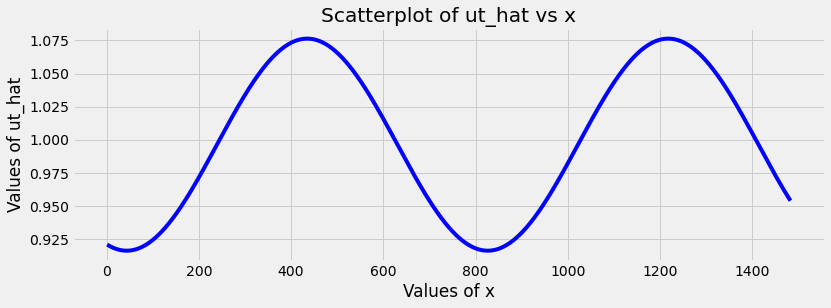

In [21]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of ut_hat")
plt.title("Scatterplot of ut_hat vs x")

plt.plot(x, ut_hat, c = "blue")

df1.head()

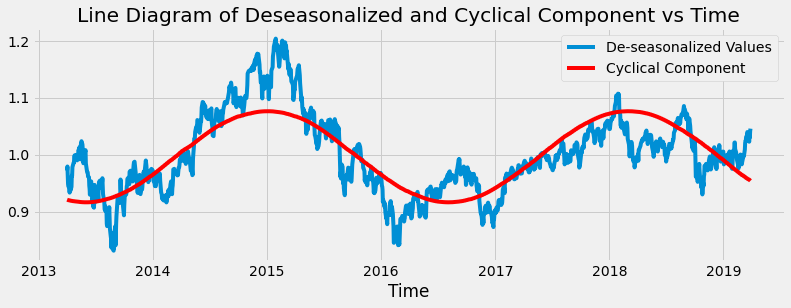

In [22]:
df1_harmonic = df1.set_index("Time")

plt.figure(figsize=(12, 4))
plt.xlabel("Time")
#plt.ylabel("Values of ut_hat")
plt.title("Line Diagram of Deseasonalized and Cyclical Component vs Time")


plt.plot(df1_harmonic["ut"], label = "De-seasonalized Values")
plt.plot(df1_harmonic["ut_hat"], c = "red", label = "Cyclical Component")

plt.legend(framealpha=1, frameon=True)

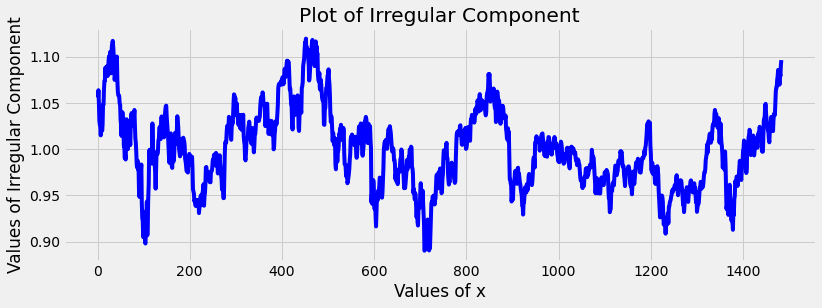

In [23]:
irregular = ut/ut_hat
irregular
df1["irregular"] = irregular
df1.head()
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(x, irregular, c = "blue")

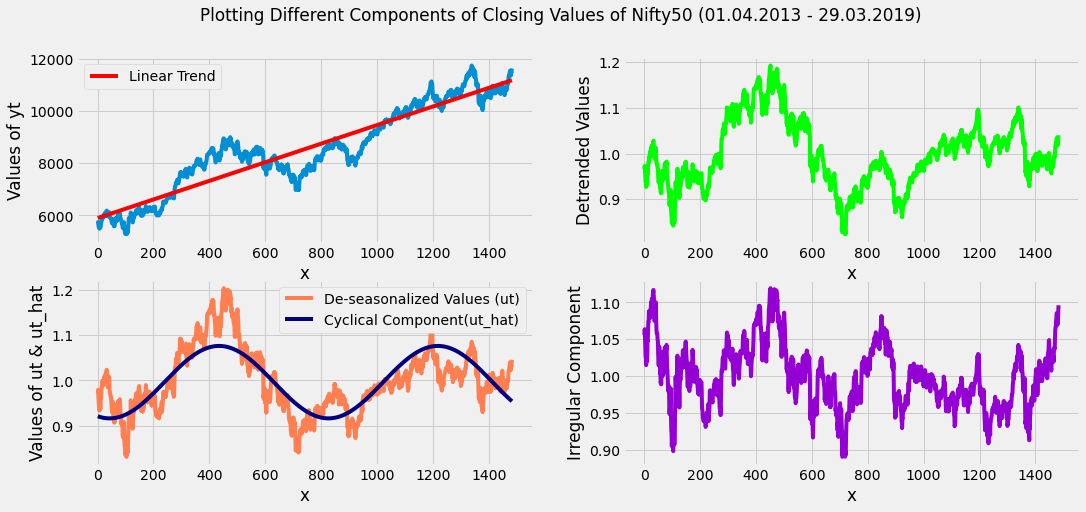

In [24]:
plt.figure(figsize=(16, 7))
plt.subplot(221)
plt.xlabel("x")
plt.ylabel("Values of yt")
#plt.title("Time Series Plot")
plt.plot(x, nifty_time["Close"])
plt.plot(myline, lin_trend(myline), color = 'red', label = 'Linear Trend')
plt.legend(framealpha=1, frameon=True)



plt.subplot(222)
plt.xlabel("x")
plt.ylabel("Detrended Values")
#plt.title("Time Series Plot of Detrended Values")
plt.plot(x, df1_time_index["detrended_value"], c = "lime")


plt.subplot(223)
plt.xlabel("x")
plt.ylabel("Values of ut & ut_hat")
#plt.title("Line Diagram of Deseasonalized and Cyclical Component vs Time")
plt.plot(x,df1_harmonic["ut"], label = "De-seasonalized Values (ut)", c = "coral")
plt.plot(x, df1_harmonic["ut_hat"], c = "navy", label = "Cyclical Component(ut_hat)")
plt.legend(framealpha=1, frameon=True)


plt.subplot(224)
plt.xlabel("x")
plt.ylabel("Irregular Component")
#plt.title("Plot of Irregular Component")
plt.plot(x, irregular, c = "darkviolet")



plt.suptitle("Plotting Different Components of Closing Values of Nifty50 (01.04.2013 - 29.03.2019)")
plt.show()


In [25]:
df1.head()

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
0,2013-04-01,1,5704.4,5904.758539,0.966068,4,0.993573,0.972317,0.972317,0.999968,0.008024,0.920784,1.055967
1,2013-04-02,2,5748.1,5908.315407,0.972883,4,0.993573,0.979176,0.979176,0.999871,0.016048,0.920572,1.063661
2,2013-04-03,3,5672.9,5911.872276,0.959578,4,0.993573,0.965784,0.965784,0.999710,0.024071,0.920365,1.049350
3,2013-04-04,4,5574.7,5915.429144,0.942400,4,0.993573,0.948496,0.948496,0.999485,0.032092,0.920162,1.030792
4,2013-04-05,5,5553.2,5918.986013,0.938201,4,0.993573,0.944270,0.944270,0.999195,0.040112,0.919965,1.026419


In [25]:
train_data = df1[:1464]
display(train_data)

test_data = df1[1464:]
#display(test_data)

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
0,2013-04-01,1,5704.40,5904.758539,0.966068,4,0.993573,0.972317,0.972317,0.999968,0.008024,0.920784,1.055967
1,2013-04-02,2,5748.10,5908.315407,0.972883,4,0.993573,0.979176,0.979176,0.999871,0.016048,0.920572,1.063661
2,2013-04-03,3,5672.90,5911.872276,0.959578,4,0.993573,0.965784,0.965784,0.999710,0.024071,0.920365,1.049350
3,2013-04-04,4,5574.70,5915.429144,0.942400,4,0.993573,0.948496,0.948496,0.999485,0.032092,0.920162,1.030792
4,2013-04-05,5,5553.20,5918.986013,0.938201,4,0.993573,0.944270,0.944270,0.999195,0.040112,0.919965,1.026419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2019-02-22,1460,10791.65,11094.229643,0.972726,2,0.980181,0.992395,0.992395,0.659534,-0.751674,0.967172,1.026079
1460,2019-02-25,1461,10880.10,11097.786511,0.980385,2,0.980181,1.000208,1.000208,0.665545,-0.746358,0.966574,1.034796
1461,2019-02-26,1462,10835.30,11101.343380,0.976035,2,0.980181,0.995770,0.995770,0.671513,-0.740993,0.965978,1.030841
1462,2019-02-27,1463,10806.65,11104.900248,0.973142,2,0.980181,0.992819,0.992819,0.677437,-0.735581,0.965384,1.028418


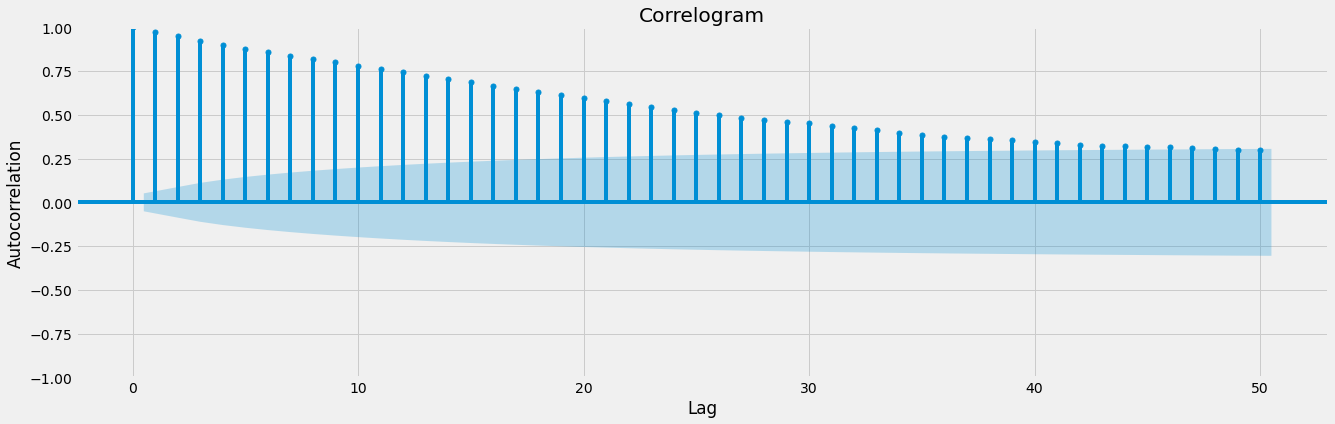

In [26]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(20, 6))
plot_acf(train_data["irregular"], lags=50, ax=ax)

# Set plot labels and title
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Correlogram')

# Show the plot
plt.show()

In [32]:
#df1.to_csv('output.csv', index= True)

In [27]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=15, trend='n')
result = model.fit()
print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
print(forecast_ar)

                            AutoReg Model Results                             
Dep. Variable:              irregular   No. Observations:                 1464
Model:                    AutoReg(15)   Log Likelihood                4772.646
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Mon, 17 Jul 2023   AIC                          -9513.292
Time:                        11:39:42   BIC                          -9428.834
Sample:                            15   HQIC                         -9481.774
                                 1464                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
irregular.L1      1.0850      0.026     41.339      0.000       1.034       1.136
irregular.L2     -0.1534      0.039     -3.964      0.000      -0.229      -0.078
irregular.L3      0.0737      0.039     

In [29]:
len(AR1_values)


1449

In [30]:
#len(irregular)
AR1_values
Ar_ax = np.floor(np.linspace(21,1464,1444))
len(Ar_ax)

1444

ValueError: x and y must have same first dimension, but have shapes (1444,) and (1449,)

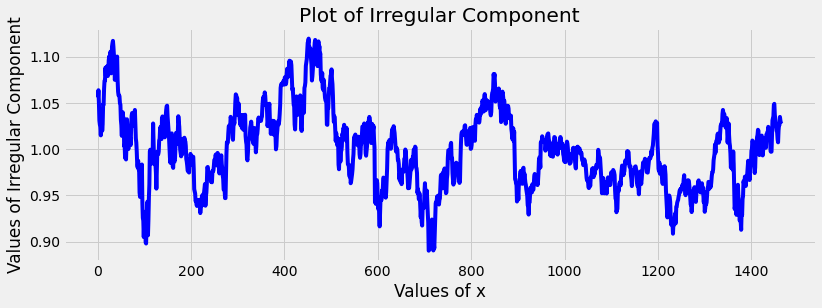

In [31]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Component")

plt.plot(train_data["x"], train_data["irregular"], c = "blue")
plt.plot(Ar_ax, AR1_values, c = "red")


In [28]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

smoothing_levels = np.linspace(0.1,0.3,100)
sse_array = []

best_alpha = None
best_mse = float('inf')

# Calculate SSE for different smoothing levels
for level in smoothing_levels:
    model = SimpleExpSmoothing(irregular)
    fitted_model = model.fit(smoothing_level=level)
    fitted_values = fitted_model.fittedvalues
   
    sse = ((fitted_values - irregular) ** 2).sum()
    sse_array.append(sse)
    mse = mean_squared_error(irregular, fitted_values)
    if mse < best_mse:
        best_alpha = level
        best_mse = mse
   
    #print("Smoothing Level:", level)
    #print("Error Sum of Squares (SSE):", sse)
    #print()
best_alpha

0.3

In [29]:
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

smoothing_levels = np.linspace(0.1,0.4,100)
sse_array = []

best_alpha = None
best_mse = float('inf')

# Calculate SSE for different smoothing levels
for level in smoothing_levels:
    model = SimpleExpSmoothing(train_data["irregular"])
    fitted_model = model.fit(smoothing_level=level)
    
    predictions = fitted_model.forecast(1)
    mse = (test_data["irregular"].iloc[0] - predictions)**2
    
    if mse.iloc[0] < best_mse:
        best_alpha = level
        best_mse = mse.iloc[0]
   
    #print("Smoothing Level:", level)
    #print("Error Sum of Squares (SSE):", sse)
    #print()
best_alpha

0.1

In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing

final_model_simp_exp = SimpleExpSmoothing(train_data["irregular"])
fitted_model_simp_exp = final_model_simp_exp.fit(smoothing_level = best_alpha)  # Adjust smoothing level as desired

# Obtain the fitted values and forecast for the next period
fitted_values_simp_exp = fitted_model_simp_exp.fittedvalues

# Print the fitted values and forecast
#print("Fitted Values:")
#print(fitted_values)

#sse = ((fitted_values - irregular) ** 2).sum()
#print("SSE:")
#print(sse)
print(fitted_model_simp_exp.summary())
fitted_values_simp_exp

                       SimpleExpSmoothing Model Results                       
Dep. Variable:              irregular   No. Observations:                 1464
Model:             SimpleExpSmoothing   SSE                              0.550
Optimized:                       True   AIC                         -11542.393
Trend:                           None   BIC                         -11531.816
Seasonal:                        None   AICC                        -11542.366
Seasonal Periods:                None   Date:                 Mon, 17 Jul 2023
Box-Cox:                        False   Time:                         11:39:57
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
initial_level              1.0498578                

0       1.049858
1       1.050469
2       1.051788
3       1.051544
4       1.049469
          ...   
1459    1.020987
1460    1.021497
1461    1.022827
1462    1.023628
1463    1.024107
Length: 1464, dtype: float64

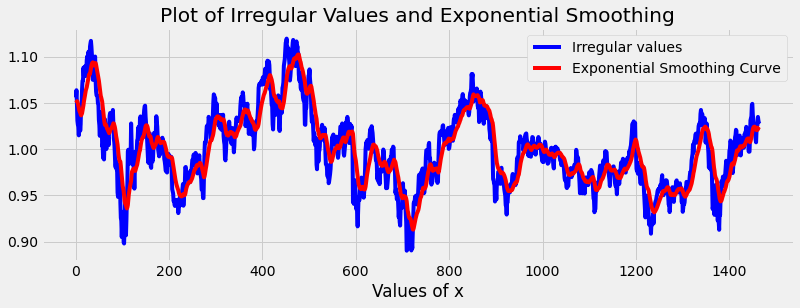

In [31]:
plt.figure(figsize=(12, 4))
plt.xlabel("Values of x")
#plt.ylabel("Values of Irregular Component")
plt.title("Plot of Irregular Values and Exponential Smoothing")

plt.plot(train_data["x"], train_data["irregular"], c = "blue", label = "Irregular values")
plt.plot(train_data["x"], fitted_values_simp_exp, c = "red", label = "Exponential Smoothing Curve")
plt.legend(framealpha=1, frameon=True)

In [32]:
test_predictions = fitted_model_simp_exp.forecast(19)
#mse = mean_squared_error(test_data['irregular'], test_predictions)
#print(mse)
#print(test_predictions)
#fitted_model_simp_exp.fittedvalues.forecast(10)
test_predictions
forecast_simexp = test_predictions

In [33]:
display(train_data)
display(test_data)

,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
0,2013-04-01,1,5704.40,5904.758539,0.966068,4,0.993573,0.972317,0.972317,0.999968,0.008024,0.920784,1.055967
1,2013-04-02,2,5748.10,5908.315407,0.972883,4,0.993573,0.979176,0.979176,0.999871,0.016048,0.920572,1.063661
2,2013-04-03,3,5672.90,5911.872276,0.959578,4,0.993573,0.965784,0.965784,0.999710,0.024071,0.920365,1.049350
3,2013-04-04,4,5574.70,5915.429144,0.942400,4,0.993573,0.948496,0.948496,0.999485,0.032092,0.920162,1.030792
4,2013-04-05,5,5553.20,5918.986013,0.938201,4,0.993573,0.944270,0.944270,0.999195,0.040112,0.919965,1.026419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2019-02-22,1460,10791.65,11094.229643,0.972726,2,0.980181,0.992395,0.992395,0.659534,-0.751674,0.967172,1.026079
1460,2019-02-25,1461,10880.10,11097.786511,0.980385,2,0.980181,1.000208,1.000208,0.665545,-0.746358,0.966574,1.034796
1461,2019-02-26,1462,10835.30,11101.343380,0.976035,2,0.980181,0.995770,0.995770,0.671513,-0.740993,0.965978,1.030841
1462,2019-02-27,1463,10806.65,11104.900248,0.973142,2,0.980181,0.992819,0.992819,0.677437,-0.735581,0.965384,1.028418


,Time,x,yt_obs,T_t,detrended_value,month,seasonal_indices,deseasonalized_values,ut,cos_pred,sin_pred,ut_hat,irregular
1464,2019-03-01,1465,10863.50,11112.013985,0.977636,3,0.994576,0.982967,0.982967,0.689155,-0.724614,0.964203,1.019461
1465,2019-03-05,1466,10987.45,11115.570853,0.988474,3,0.994576,0.993864,0.993864,0.694947,-0.719061,0.963615,1.031392
1466,2019-03-06,1467,11053.00,11119.127722,0.994053,3,0.994576,0.999474,0.999474,0.700695,-0.713461,0.963029,1.037844
1467,2019-03-07,1468,11058.20,11122.684590,0.994202,3,0.994576,0.999624,0.999624,0.706397,-0.707816,0.962445,1.038629
1468,2019-03-08,1469,11035.40,11126.241459,0.991835,3,0.994576,0.997244,0.997244,0.712054,-0.702124,0.961864,1.036783
1469,2019-03-11,1470,11168.05,11129.798327,1.003437,3,0.994576,1.008909,1.008909,0.717665,-0.696388,0.961285,1.049542
1470,2019-03-12,1471,11301.20,11133.355196,1.015076,3,0.994576,1.020611,1.020611,0.723230,-0.690607,0.960708,1.062354
1471,2019-03-13,1472,11341.70,11136.912064,1.018388,3,0.994576,1.023942,1.023942,0.728749,-0.684781,0.960133,1.066458
1472,2019-03-14,1473,11343.25,11140.468933,1.018202,3,0.994576,1.023755,1.023755,0.734220,-0.678911,0.959561,1.066899
1473,2019-03-15,1474,11426.85,11144.025801,1.025379,3,0.994576,1.030971,1.030971,0.739645,-0.672998,0.958991,1.075058


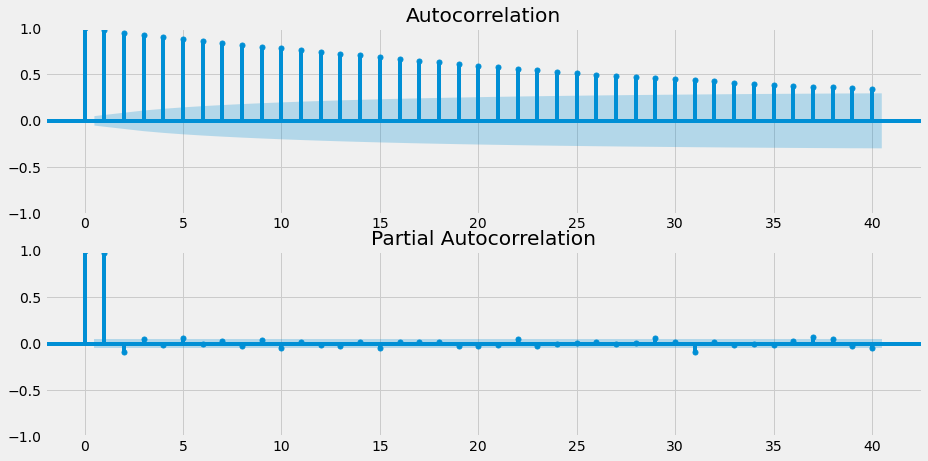

In [34]:
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7))
sm.graphics.tsa.plot_acf(train_data["irregular"], ax=ax1, lags=40)
sm.graphics.tsa.plot_pacf(train_data["irregular"], ax=ax2, lags=40,  method='ywm')
plt.show()

In [35]:
plt.figure(figsize=(12, 4))

import statsmodels.api as sm
model_arima = sm.tsa.ARIMA(train_data["irregular"], order=(15, 0, 2))  # ARIMA(p, d, q) where d=0 for ARMA model
results_arima = model_arima.fit(method_kwargs={'maxiter': 4000})
fitted_values_arima = results_arima.fittedvalues
print(fitted_values_arima)

est_residual_train = fitted_values_arima

est_yt_train = train_data["T_t"]*train_data["seasonal_indices"]*train_data["ut_hat"]*est_residual_train
print(est_residual_train)
print(est_yt_train)


0       0.999193
1       1.054635
2       1.062687
3       1.046508
4       1.029194
          ...   
1459    1.024845
1460    1.025646
1461    1.034707
1462    1.029290
1463    1.027949
Length: 1464, dtype: float64
0       0.999193
1       1.054635
2       1.062687
3       1.046508
4       1.029194
          ...   
1459    1.024845
1460    1.025646
1461    1.034707
1462    1.029290
1463    1.027949
Length: 1464, dtype: float64
0        5397.700511
1        5699.323875
2        5745.002136
3        5659.696199
4        5568.213160
            ...     
1459    10778.672940
1460    10783.886888
1461    10875.934573
1462    10815.809111
1463    10798.547771
Length: 1464, dtype: float64


<Figure size 864x288 with 0 Axes>

In [36]:
model = sm.tsa.AutoReg(train_data["irregular"], lags=5, trend='n')
result = model.fit()
#print(result.summary())
AR1_values = result.fittedvalues

forecast_ar = result.predict(start=len(train_data["irregular"]), end=len(train_data["irregular"]) + 18)
#print(forecast_ar)

In [37]:
forecast_start = len(train_data["irregular"])
forecast_end = forecast_start + 18  # Adjust the forecast horizon as needed
forecast = results_arima.predict(start=forecast_start, end=forecast_end)
#print(forecast)

est_residual_test = forecast
est_yt_test = test_data["T_t"]*test_data["seasonal_indices"]*test_data["ut_hat"]*est_residual_test
est_yt_test_ar = test_data["T_t"]*test_data["seasonal_indices"]*test_data["ut_hat"]*forecast_ar
est_yt_test_simexp = test_data["T_t"]*test_data["seasonal_indices"]*test_data["ut_hat"]*forecast_simexp

2       1.049350
3       1.030792
4       1.026419
5       1.024114
6       1.014880
          ...   
1459    1.026079
1460    1.034796
1461    1.030841
1462    1.028418
1463    1.027373
Name: irregular, Length: 1462, dtype: float64


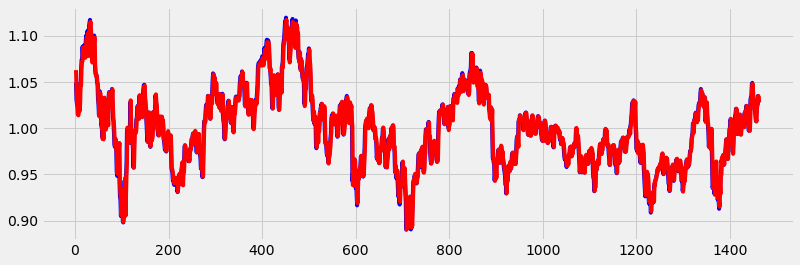

In [38]:
plt.figure(figsize=(12, 4))
plt.plot((train_data["irregular"])[2:], color = "blue")
plt.plot(fitted_values_arima[2:], color = "red")

#plt.plot(fitted_values_arima, color = "red")
print((train_data["irregular"])[2:])

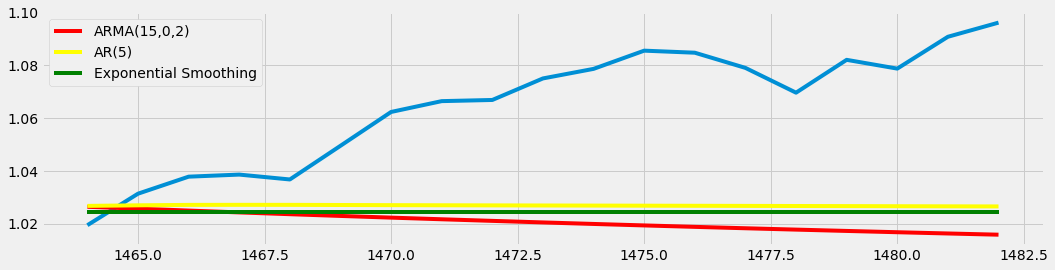

In [39]:
plt.figure(figsize=(16, 4))
plt.plot(test_data["irregular"])
plt.plot(forecast, color = "red", label = "ARMA(15,0,2)")
plt.plot(forecast_ar, color = "yellow", label = "AR(5)")
plt.plot(forecast_simexp, color = "green", label = "Exponential Smoothing")
plt.legend(framealpha=1, frameon=True)

plt.show()

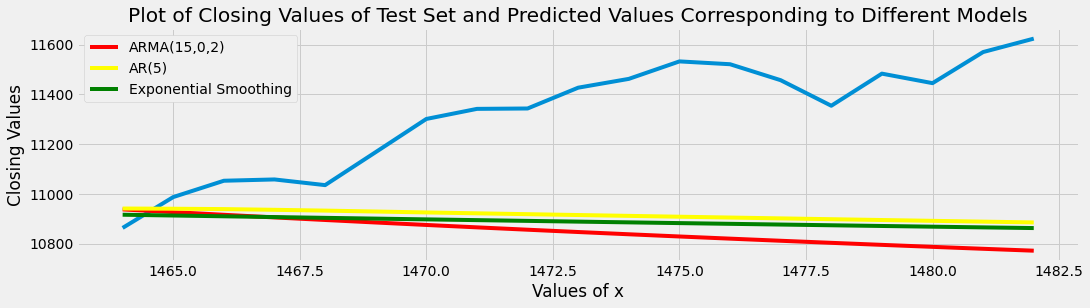

5482483.358292592
4110789.232613759
4510177.946479434


In [40]:
plt.figure(figsize=(16, 4))
plt.xlabel("Values of x")
plt.ylabel("Closing Values")
plt.plot(test_data["yt_obs"])
plt.plot(est_yt_test, color = "red", label = "ARMA(15,0,2)")
plt.plot(est_yt_test_ar, color = "yellow", label = "AR(5)")
plt.plot(est_yt_test_simexp, color = "green", label = "Exponential Smoothing")
plt.title("Plot of Closing Values of Test Set and Predicted Values Corresponding to Different Models")
plt.legend(framealpha=1, frameon=True)
plt.show()

test_error_arma = sum(np.square(test_data["yt_obs"] - est_yt_test))
print(test_error_arma)

test_error_ar = sum(np.square(test_data["yt_obs"] - est_yt_test_ar))
print(test_error_ar)

test_error_simexp = sum(np.square(test_data["yt_obs"] - est_yt_test_simexp))
print(test_error_simexp)
